# Visualizing Single Cell DNA Methylation Data (Loyfer2023)

In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *
#oncoPrint: https://genominfo.org/upload/pdf/gi-22079.pdf; https://github.com/pnucolab/pyoncoprint

Here, we use the same dataset from R package ComplexHeatmap (https://jokergoo.github.io/ComplexHeatmap-reference/book/oncoprint.html#apply-to-cbioportal-dataset).

In [2]:
data=pd.read_csv("../data/tcga_lung_adenocarcinoma_provisional_ras_raf_mek_jnk_signalling.txt",sep='\t',index_col=0)
data=data.iloc[:,:-1]
data=data.stack().reset_index()
data.columns=['SampleID','Genes','Variants']
data.Variants.replace({'  ':np.nan},inplace=True)

In [3]:
print(data.Variants.dropna().unique())
data.head()

['MUT;' 'AMP;' 'HOMDEL;' 'MUT;AMP;']


,SampleID,Genes,Variants
0,TCGA-05-4384-01,KRAS,NaN
1,TCGA-05-4384-01,HRAS,NaN
2,TCGA-05-4384-01,BRAF,NaN
3,TCGA-05-4384-01,RAF1,NaN
4,TCGA-05-4384-01,MAP3K1,NaN


In [4]:
unique_variants=[]
for var in data.Variants.dropna().unique():
    for v1 in var.split(';'):
        v1=v1.strip()
        if v1=='':
            continue
        if v1 not in unique_variants:
            unique_variants.append(v1)
print(unique_variants)
for var in unique_variants:
    data[var]=data.Variants.fillna('').apply(lambda x:1 if var in x else 0)

['MUT', 'AMP', 'HOMDEL']


In [5]:
data.head()

,SampleID,Genes,Variants,MUT,AMP,HOMDEL
0,TCGA-05-4384-01,KRAS,NaN,0,0,0
1,TCGA-05-4384-01,HRAS,NaN,0,0,0
2,TCGA-05-4384-01,BRAF,NaN,0,0,0
3,TCGA-05-4384-01,RAF1,NaN,0,0,0
4,TCGA-05-4384-01,MAP3K1,NaN,0,0,0


In [6]:
hue_order=['HOMDEL','MUT', 'AMP']
# data.set_index(['Genes','SampleID']).loc[:,cols].stack().reset_index()
data2d=data.assign(Var=data.loc[:,hue_order].apply(lambda x:x.tolist(),axis=1)).pivot(index='Genes',columns='SampleID',values='Var')
row_vc=data2d.apply(lambda x:x.apply(np.array).sum(),axis=1)
col_vc=data2d.apply(lambda x:x.apply(np.array).sum(),axis=0)
data2d.head()

SampleID,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-75-6207-01,TCGA-75-6211-01,TCGA-75-6212-01,TCGA-80-5611-01,TCGA-86-6562-01,TCGA-91-6828-01,TCGA-91-6829-01,TCGA-91-6831-01,TCGA-91-6835-01,TCGA-91-6836-01
Genes,,,,,,,,,,,,,,,,,,,,,
BRAF,"[0, 0, 0]","[0, 1, 0]","[0, 0, 0]","[0, 1, 0]","[0, 0, 0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
DAB2,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 1, 1]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 1, 0]","[0, 0, 1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
HRAS,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1, 0, 0]"
KRAS,"[0, 1, 0]","[0, 1, 0]","[0, 1, 1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 1, 0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[1, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 1]","[0, 1, 1]"
MAP2K1,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 1, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"


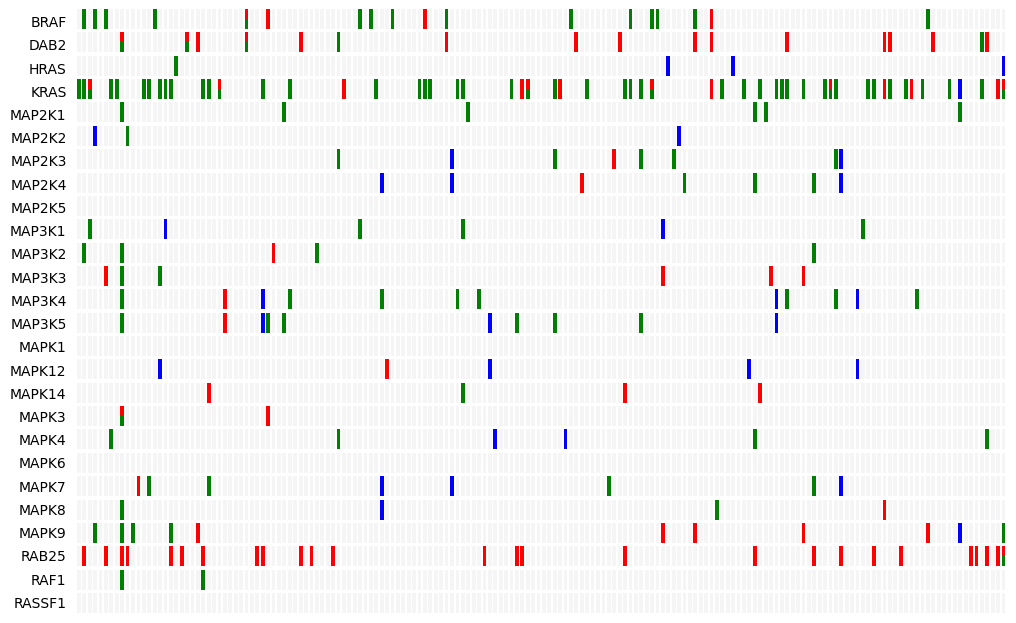

In [7]:
plt.figure(figsize=(12,8))
ax,axes=oncoprint(data2d,colors=["blue","#008000","red"],
                  xticklabels_kws={'labelbottom':False})
plt.show()

In [8]:
data2d.index

Index(['BRAF', 'DAB2', 'HRAS', 'KRAS', 'MAP2K1', 'MAP2K2', 'MAP2K3', 'MAP2K4',
       'MAP2K5', 'MAP3K1', 'MAP3K2', 'MAP3K3', 'MAP3K4', 'MAP3K5', 'MAPK1',
       'MAPK12', 'MAPK14', 'MAPK3', 'MAPK4', 'MAPK6', 'MAPK7', 'MAPK8',
       'MAPK9', 'RAB25', 'RAF1', 'RASSF1'],
      dtype='object', name='Genes')

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


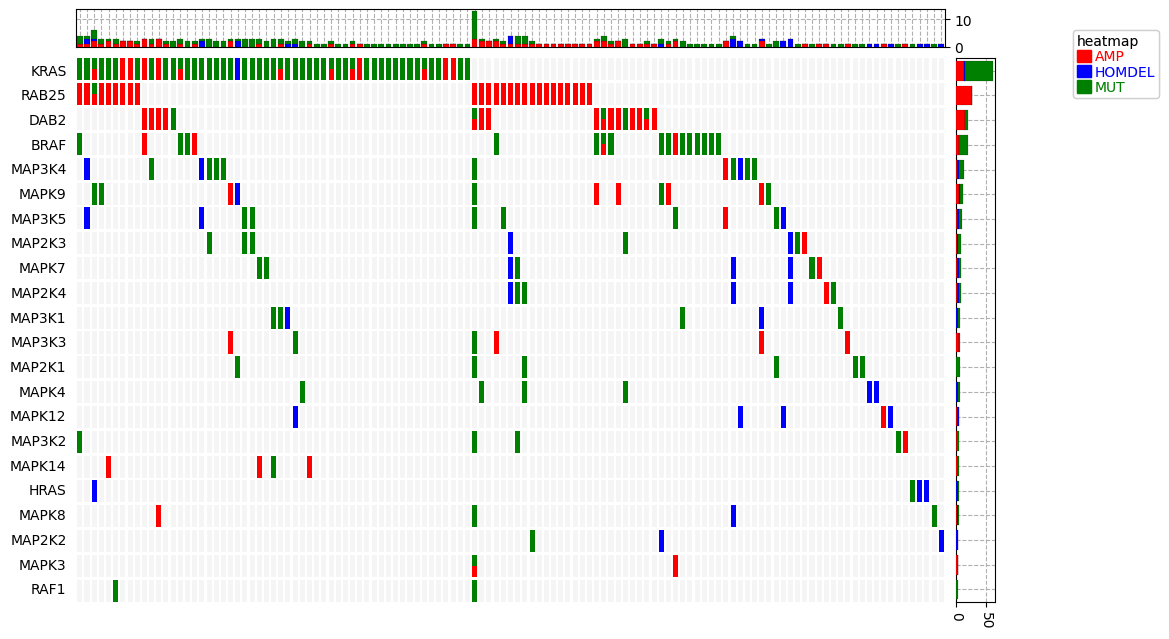

In [9]:
cols=['AMP','HOMDEL','MUT']
colors=["red","blue","#008000"]
row_vc=data.groupby('Genes').apply(lambda x:x.loc[:,cols].sum())
col_vc=data.groupby('SampleID').apply(lambda x:x.loc[:,cols].sum())
top_annotation=HeatmapAnnotation(axis=1,orientation='up',
                                Col=anno_barplot(col_vc,colors=colors,legend=False,height=10,linewidth=0.1),
                                verbose=0, label_side='left', label_kws={'horizontalalignment': 'right','visible':False})
right_annotation = HeatmapAnnotation(axis=0,orientation='right',
                                Row=anno_barplot(row_vc,colors=colors,legend=False,height=10,linewidth=0.1),
                                verbose=0, label_side='top', label_kws={'horizontalalignment': 'left','rotation':45,'visible':False})
            
plt.figure(figsize=(12,8))
op=oncoPrintPlotter(data=data,y='Genes',x='SampleID',
                    values=cols,colors=colors,subplot_gap=3,
                    top_annotation=top_annotation,right_annotation=right_annotation,
                   show_rownames=True,show_colnames=False) #xticklabels_kws={'labelsize':3}
plt.savefig("oncoPrint.pdf",bbox_inches='tight')
plt.show()

In [19]:
op.row_order

[['KRAS',
  'RAB25',
  'DAB2',
  'BRAF',
  'MAP3K4',
  'MAPK9',
  'MAP3K5',
  'MAP2K3',
  'MAPK7',
  'MAP2K4',
  'MAP3K1',
  'MAP3K3',
  'MAP2K1',
  'MAPK4',
  'MAPK12',
  'MAP3K2',
  'MAPK14',
  'HRAS',
  'MAPK8',
  'MAP2K2',
  'MAPK3',
  'RAF1']]